In [2]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

## Bivariate Guasian


In [ ]:
n=10000
means = [20, 30]
rho = .5
sigma_x = 2
sigma_y = 3
fw = 50
covs = [[sigma_x**2,sigma_x*sigma_y*rho],[sigma_x*sigma_y*rho, sigma_y**2]]
g_xy = scipy.stats.multivariate_normal.rvs(mean=means, cov=covs, size=n, random_state=123)
g_xy = g_xy.round().astype(int)
p_xy = np.zeros((fw,fw))
for x,y in g_xy:
    p_xy[x,y] +=1/n

pw = slice(10,40) 
pw = slice(10,40)    
plt.imshow(p_xy[pw,pw], cmap='gray')
plt.xlabel('Y Values')
plt.ylabel('X Values')
plt.title('Joint Distribution')
plt.colorbar()
plt.show()

sum(sum(p_xy==0))


In [ ]:
t= list(range(p_xy.shape[0]))
p_y  = p_xy.sum(0)
p_x  = p_xy.sum(1)
plt.plot(t,p_x,'r',label='p(x)')
plt.plot(t,p_y,'b',label='p(y)')
plt.legend(loc="upper right")
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Marginal Distribution')
plt.show()


In [ ]:
p_xp_y = p_x[:,None].dot(p_y[None,:])
plt.imshow(p_xp_y, cmap='gray')
plt.xlabel('Y Values')
plt.ylabel('X Values')
plt.title('p(x)*p(y)')
plt.colorbar()
plt.show()

In [ ]:
I = 0
errorsNumer = []
for x in range(20):
    for y in range(20):
        if (p_x[x]==0 or p_y[y]==0 or p_xy[x,y] ==0):
            errorsNumer.append([p_x[x],p_y[y],p_xy[x,y]])
        else:
            I+=p_xy[x,y]*np.log2(p_xy[x,y]/(p_x[x]*p_y[y]))
I


## Simple But Complicated


In [10]:
p_T=.5
p_X=.5
p_t0 = .25
p_t1 = .7
n=5000
data_TXZ = np.zeros([n,3]).astype(int)

np.random.seed(seed=123)
data_TXZ[:,0] = scipy.stats.bernoulli.rvs(p_T, size=n)

np.random.seed(seed=456)
data_TXZ[:,1] = scipy.stats.bernoulli.rvs(p_X, size=n)

Z=[]
for index in range(n):
    t = data_TXZ[index,0]
    np.random.seed(seed=index)
    data_TXZ[index,2] = scipy.stats.bernoulli.rvs(p_t0*(1-t)+p_t1*t)

print('\nFirst 5 obs of our table::')
print(data_TXZ[:5,:])

pmf_TXZ = np.zeros([2,2,2])
for obs in data_TXZ:
    pmf_TXZ[tuple(obs)] += 1/n

print('pmf_TXZ:')
print(pmf_TXZ)

pmf_XZ = np.sum(pmf_TXZ,0)
print('\npmf_XZ:')
print(pmf_XZ)

pmf_T = np.sum(np.sum(pmf_TXZ,2),1)
print('\npmf_T:')
print(pmf_T)

I=0
for t in range(2):
    for x in range(2):
        for z in range(2):
            I += pmf_TXZ[t,x,z]*np.log2(pmf_TXZ[t,x,z]/(pmf_T[t]*pmf_XZ[x,z]))

print('\nI:')
round(I,3)


# I(T:XZ)




First 5 obs of our table::
[[1 0 1]
 [0 0 0]
 [0 1 0]
 [1 1 1]
 [1 1 0]]
pmf_TXZ:
[[[0.1808 0.0656]
  [0.1934 0.0584]]

 [[0.0738 0.1786]
  [0.0728 0.1766]]]

pmf_XZ:
[[0.2546 0.2442]
 [0.2662 0.235 ]]

pmf_T:
[0.4982 0.5018]

I:


0.158

We now can see that that the mutual information shared between T and X and Z  is .158, i.e. if you know the states of X and Z you can be sure that you may now about about a "fifth" of a bit of T. You may be thinking that this doesn't seem to be that much information, but to truly see if this is a "nonzero", we need to do a statistal test:
We use a Monte Carlo Simulation to test $H_0: I=0$ 

Maximum from the I trials: 0.0025


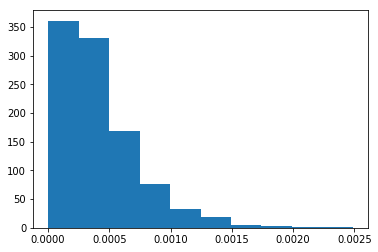

In [16]:
T = np.array(data_TXZ[:,0], copy=True)
Itrials = []
np.random.seed(123)
trialsNum = 1000
for trial in range(trialsNum):
    currI=0
    np.random.shuffle(data_TXZ[:,0])
    curr_pmf_TXZ = np.zeros([2,2,2])
    for obs in data_TXZ:
        curr_pmf_TXZ[tuple(obs)] += 1/n
    for t in range(2):
        for x in range(2):
            for z in range(2):
                currI += curr_pmf_TXZ[t,x,z]*np.log2(curr_pmf_TXZ[t,x,z]/(pmf_T[t]*pmf_XZ[x,z]))
    Itrials.append(currI)
    
plt.hist(Itrials)
print('Maximum from the I trials: %1.4f' % max(Itrials))

(array([1452.75389826, 1332.02642749,  680.09808534,  305.84292595,
         132.80021785,   72.43648246,   20.12124513,   16.0969961 ,
           8.04849805,    4.02424903]),
 array([2.70194843e-06, 2.51195517e-04, 4.99689085e-04, 7.48182653e-04,
        9.96676222e-04, 1.24516979e-03, 1.49366336e-03, 1.74215693e-03,
        1.99065049e-03, 2.23914406e-03, 2.48763763e-03]),
 <a list of 10 Patch objects>)

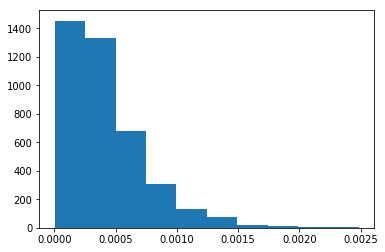

In [34]:
plt.hist(Itrials, density=True)


As  we can see, all calculated mututal information from the 1000 permutation tests are less than our original I, thus p-value<.001 so we may reject the null hypothesis.

Now our next step is to see which covariate is the most reponsible:

In [33]:
data_TXZ[:,0] = Tt
pmf_Z = np.sum(np.sum(pmf_TXZ,0),0)
pmf_TZ = np.sum(pmf_TXZ,1)



I_TXgivenZ = 0
for t in range(2):
    for x in range(2):
        for z in range(2):
            I_TXgivenZ += pmf_TXZ[t,x,z]*np.log2(pmf_Z[z]*pmf_TXZ[t,x,z]/(pmf_TZ[t,z]*pmf_XZ[x,z]))
            
pmf_X = np.sum(pmf_XZ,1)
pmf_TX = np.sum(pmf_TXZ,2)

            
I_TZgivenX = 0
for t in range(2):
    for x in range(2):
        for z in range(2):
            I_TZgivenX += pmf_TXZ[t,x,z]*np.log2(pmf_X[x]*pmf_TXZ[t,x,z]/(pmf_TX[t,x]*pmf_XZ[x,z]))

norm = 2*I-I_TXgivenZ-I_TZgivenX
degZ= (I-I_TXgivenZ)/norm
degX= (I-I_TZgivenX)/norm
print('Deg of Responsibility for Z: %1.4f' % degZ)
print('Deg of Responsibility for X: %1.4f' % degX)

Deg of Responsibility for Z: 0.9997
Deg of Responsibility for X: 0.0003


In [22]:
np.sum(pmf_TXZ,2)


array([[0.2464, 0.2518],
       [0.2524, 0.2494]])